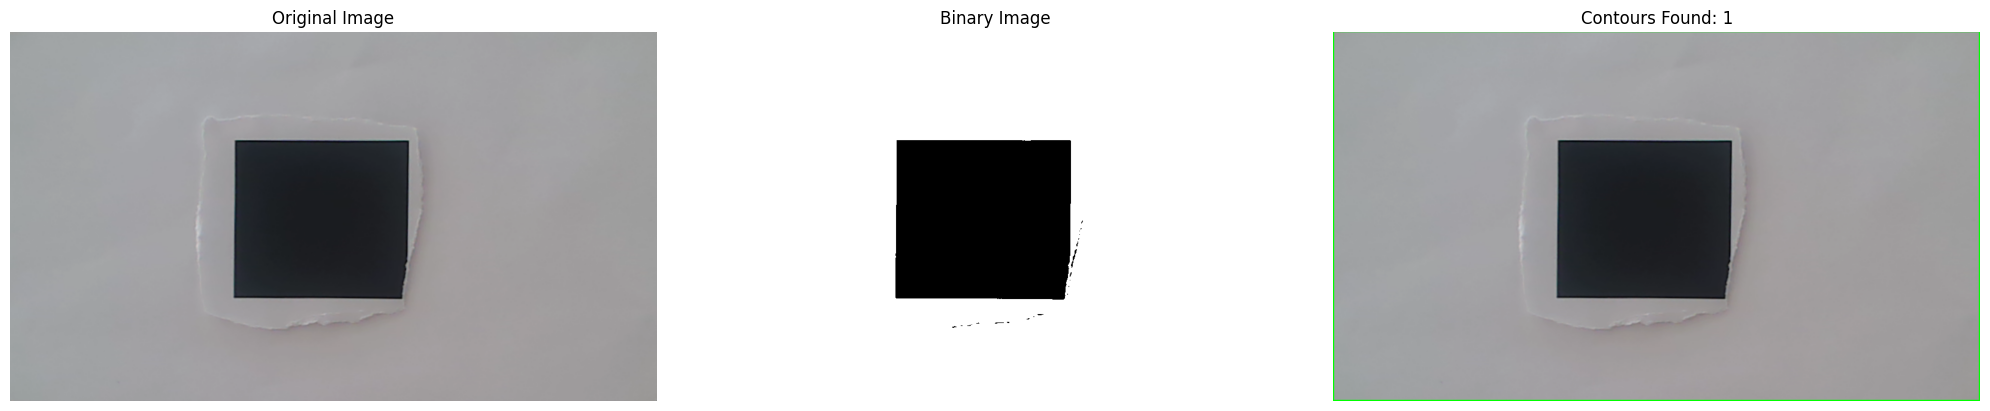

Number of contours found: 1
Image shape: (617, 1080)
Image data type: uint8


In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import yaml

# Read the image
map_img = cv2.imread('map_view.png')
original_for_contours = map_img.copy()  # Make a copy for drawing contours

# Convert to grayscale
gray_image = cv2.cvtColor(map_img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
cv2.drawContours(original_for_contours, contours, -1, (0, 255, 0), 2)  # Green color, thickness=2

# Create figure with three subplots
plt.figure(figsize=(20, 6))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(map_img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.axis('off')
plt.title('Original Image')

# Display binary image
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.title('Binary Image')

# Display image with contours
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(original_for_contours, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.axis('off')
plt.title(f'Contours Found: {len(contours)}')

# Show the plots
plt.tight_layout()
plt.show()

# Print information about contours
print(f"Number of contours found: {len(contours)}")
print(f"Image shape: {gray_image.shape}")
print(f"Image data type: {gray_image.dtype}")

In [20]:
scale = 21/1080

In [23]:
# Define the map size in cm
img_cm_x = gray_image.shape[0] * scale

img_cm_y = gray_image.shape[1] * scale
print(f"Image size in cm: {img_cm_x:.2f} x {img_cm_y:.2f} cm")

Image size in cm: 12.00 x 21.00 cm
